In [1]:
# import necessary libarries
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb

In [2]:
# reading csv file
colnames=['Key', 'Values']
df = pd.read_csv("output5.csv", sep='\t', names=colnames, header=None)

In [3]:
# split column 
df[['Temperature', 'Humidity']] = df['Values'].str.split(',', expand=True)
df[["Jan Temperature", "Feb Temperature", "Mar Temperature", "Apr Temperature",
   "May Temperature", "Jun Temperature", "Jul Temperature", 
   "Aug Temperature", "Sep Temperature", "Oct Temperature", 
   "Nov Temperature", "Dec Temperature"]] = df['Temperature'].str.split(';', expand=True)
df[["Jan Humidity", "Feb Humidity", "Mar Humidity", "Apr Humidity",
   "May Humidity", "Jun Humidity", "Jul Humidity", 
   "Aug Humidity", "Sep Humidity", "Oct Humidity", 
   "Nov Humidity", "Dec Humidity"]] = df['Humidity'].str.split(';', expand=True)

df = df.drop(["Values"], axis=1)
df = df.drop(["Temperature"], axis=1)
df = df.drop(["Humidity"], axis=1)

df['Jan Temperature'] = df['Jan Temperature'].astype(float, errors = 'raise')
df['Feb Temperature'] = df['Feb Temperature'].astype(float, errors = 'raise')
df['Mar Temperature'] = df['Mar Temperature'].astype(float, errors = 'raise')
df['Apr Temperature'] = df['Apr Temperature'].astype(float, errors = 'raise')
df['May Temperature'] = df['May Temperature'].astype(float, errors = 'raise')
df['Jun Temperature'] = df['Jun Temperature'].astype(float, errors = 'raise')
df['Jul Temperature'] = df['Jul Temperature'].astype(float, errors = 'raise')
df['Aug Temperature'] = df['Aug Temperature'].astype(float, errors = 'raise')
df['Sep Temperature'] = df['Sep Temperature'].astype(float, errors = 'raise')
df['Oct Temperature'] = df['Oct Temperature'].astype(float, errors = 'raise')
df['Nov Temperature'] = df['Nov Temperature'].astype(float, errors = 'raise')
df['Dec Temperature'] = df['Dec Temperature'].astype(float, errors = 'raise')

df['Jan Humidity'] = df['Jan Humidity'].astype(float, errors = 'raise')
df['Feb Humidity'] = df['Feb Humidity'].astype(float, errors = 'raise')
df['Mar Humidity'] = df['Mar Humidity'].astype(float, errors = 'raise')
df['Apr Humidity'] = df['Apr Humidity'].astype(float, errors = 'raise')
df['May Humidity'] = df['May Humidity'].astype(float, errors = 'raise')
df['Jun Humidity'] = df['Jun Humidity'].astype(float, errors = 'raise')
df['Jul Humidity'] = df['Jul Humidity'].astype(float, errors = 'raise')
df['Aug Humidity'] = df['Aug Humidity'].astype(float, errors = 'raise')
df['Sep Humidity'] = df['Sep Humidity'].astype(float, errors = 'raise')
df['Oct Humidity'] = df['Oct Humidity'].astype(float, errors = 'raise')
df['Nov Humidity'] = df['Nov Humidity'].astype(float, errors = 'raise')
df['Dec Humidity'] = df['Dec Humidity'].astype(float, errors = 'raise')

In [4]:
df = df[df.Key != 'Coimbatore']
df = df[df.Key != 'Monterrey']
df = df[df.Key != 'Tianjin']
df = df[df.Key != 'Beijing']

df = df[df.Key != 'Brisbane']
df = df[df.Key != 'Guangzhou']
df = df[df.Key != 'Perth']
df = df[df.Key != 'Sydney']

df = df[df.Key != 'Krasnodar']


df = df.reset_index(drop=True)
df

,Key,Jan Temperature,Feb Temperature,Mar Temperature,Apr Temperature,May Temperature,Jun Temperature,Jul Temperature,Aug Temperature,Sep Temperature,...,Mar Humidity,Apr Humidity,May Humidity,Jun Humidity,Jul Humidity,Aug Humidity,Sep Humidity,Oct Humidity,Nov Humidity,Dec Humidity
0,ANCHORAGE INTL ARPT,-7.758213,-6.079891,-3.109225,3.925080,9.708143,14.040244,16.231975,14.845638,10.244906,...,69.064427,64.684144,63.783478,65.586783,71.466964,73.670444,77.322910,76.585161,79.299765,80.100658
1,Aguascalientes,14.136465,16.400647,18.629142,20.649651,22.653225,21.567897,19.651072,20.107290,19.504117,...,33.179133,25.746729,30.492313,50.147854,62.238437,62.427676,64.677674,57.453153,50.796577,46.156801
2,Alice Springs,29.580855,29.475378,26.412500,21.404952,15.703391,12.166013,13.227101,15.114158,19.615006,...,37.180934,34.762975,45.290647,53.294264,41.631389,33.860246,29.788492,28.589226,33.797461,34.195573
3,Bhubaneswar,21.669758,25.033162,28.481516,30.530092,30.932521,29.896205,28.824353,28.475483,28.332190,...,72.145432,72.661616,74.968910,82.550238,87.782905,88.928814,88.902002,84.591810,75.986737,73.171987
4,Cairns,27.246009,27.385568,26.869980,25.499763,23.797274,22.262966,21.770475,22.055341,23.436685,...,80.101396,77.722408,76.107149,76.595200,74.145348,70.842386,70.141456,72.798606,71.606617,75.132374
5,Cancun,23.177553,24.157944,25.324427,26.696327,27.592216,27.973359,28.541823,28.367688,27.854662,...,75.276178,76.958468,78.270158,82.677229,81.041725,82.683156,84.134690,85.055718,83.587835,82.810670
6,Chengdu,7.807566,10.496825,15.088846,19.476957,23.181679,25.661505,27.152738,27.187284,23.057784,...,71.016310,70.248343,67.560953,74.106202,75.627587,78.321239,82.966876,82.844438,79.302034,79.492534
7,Chihuahua,10.972917,14.975913,18.672520,22.252114,26.212374,29.065275,27.454818,26.410615,24.667785,...,27.411684,22.909709,21.575655,29.805946,43.605174,48.505407,49.495759,44.354458,42.165700,43.301690
8,Chongqing,7.903494,10.372777,14.883009,19.264057,22.240538,25.233962,28.658663,29.186395,23.762406,...,72.010260,72.290477,74.133524,77.005527,71.232670,67.430853,78.645498,83.761147,81.126426,81.180592
9,Ciudad Juarez,9.396959,13.320529,17.692790,21.671671,26.095744,31.021526,30.818742,29.916353,27.179532,...,31.725138,25.329339,23.215933,26.678365,35.968076,38.531430,40.235727,39.132217,40.128493,45.060303


[[ 25.1006791   26.35799778  27.44876002  27.9251813   27.25231388
   26.06718851  25.58552712  25.80387655  26.63731523  27.11733535
   26.72576198  25.67240075  76.73102315  75.21675327  75.53543488
   73.75664688  73.05795495  76.32875389  77.25904829  76.39262479
   75.85016531  75.62142427  72.74661157  75.09638404]
 [ 17.17580105  19.23602543  20.74712271  22.00578838  22.79875658
   23.96050118  23.49556867  23.57226129  23.35334141  22.54666405
   19.77682044  17.52889883  44.04263278  39.35707501  37.01085605
   31.11067463  33.50676538  43.51047015  50.5632079   51.38787451
   51.22445073  45.30493944  43.40988249  43.85481327]
 [-11.37791125  -8.88550606  -2.46782327   5.83245943  12.76368631
   17.57740719  19.51253796  17.65210581  11.75446767   4.41493321
   -4.63420549  -8.96597388  78.4160057   75.74876254  68.87341752
   59.58013801  59.23489847  64.41462075  70.61054862  72.43022352
   74.32342214  73.8321926   79.32049237  81.06695815]
 [  6.79643096   8.86890806  12

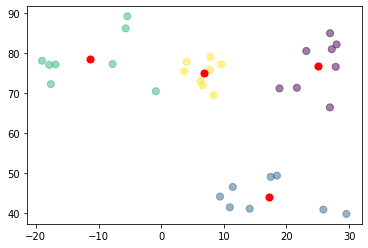

In [5]:
kmeans = KMeans(n_clusters=4).fit(df[["Jan Temperature", "Feb Temperature", "Mar Temperature", "Apr Temperature",
   "May Temperature", "Jun Temperature", "Jul Temperature", 
   "Aug Temperature", "Sep Temperature", "Oct Temperature", 
   "Nov Temperature", "Dec Temperature", "Jan Humidity", "Feb Humidity", "Mar Humidity", "Apr Humidity",
   "May Humidity", "Jun Humidity", "Jul Humidity", 
   "Aug Humidity", "Sep Humidity", "Oct Humidity", 
   "Nov Humidity", "Dec Humidity"]])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Jan Temperature'], df['Jan Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 12], c='red', s=50)
plt.show()

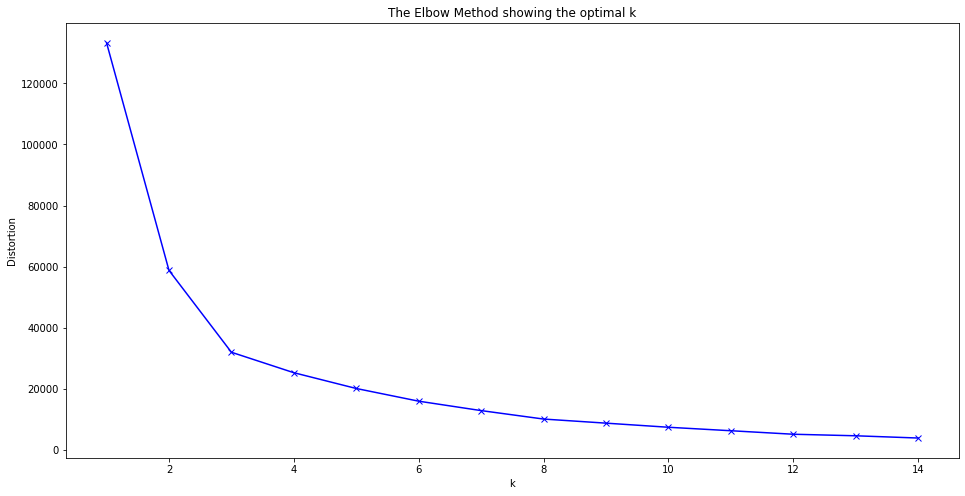

In [6]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[["Jan Temperature", "Feb Temperature", "Mar Temperature", "Apr Temperature",
   "May Temperature", "Jun Temperature", "Jul Temperature", 
   "Aug Temperature", "Sep Temperature", "Oct Temperature", 
   "Nov Temperature", "Dec Temperature", "Jan Humidity", "Feb Humidity", "Mar Humidity", "Apr Humidity",
   "May Humidity", "Jun Humidity", "Jul Humidity", 
   "Aug Humidity", "Sep Humidity", "Oct Humidity", 
   "Nov Humidity", "Dec Humidity"]])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
# # outliers detection
# # Extract the Features from the Data
# X = pd.DataFrame(df[["Jan Temperature", "Feb Temperature", "Mar Temperature", "Apr Temperature",
#    "May Temperature", "Jun Temperature", "Jul Temperature", 
#    "Aug Temperature", "Sep Temperature", "Oct Temperature", 
#    "Nov Temperature", "Dec Temperature", "Jan Humidity", "Feb Humidity", "Mar Humidity", "Apr Humidity",
#    "May Humidity", "Jun Humidity", "Jul Humidity", 
#    "Aug Humidity", "Sep Humidity", "Oct Humidity", 
#    "Nov Humidity", "Dec Humidity"]])
                           
# # Plot the Raw Data on a 2D grid
# f, axes = plt.subplots(1, 1, figsize=(8,4))
# plt.scatter(x = "Jan Temperature", y = "Jan Humidity", data = X)   

In [8]:
# # Import LocalOutlierFactor from sklearn.neighbors
# from sklearn.neighbors import LocalOutlierFactor

# # Set the Parameters for Neighborhood
# num_neighbors = 30      # Number of Neighbors
# cont_fraction = 0.05    # Fraction of Anomalies

# # Create Anomaly Detection Model using LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# # Fit the Model on the Data and Predict Anomalies
# lof.fit(X)

In [9]:
# # Predict the Anomalies
# labels = lof.fit_predict(X)

# # Append Labels to the Data
# X_labeled = X.copy()
# X_labeled["Anomaly"] = pd.Categorical(labels)

# # Summary of the Anomaly Labels
# sb.countplot(X_labeled["Anomaly"])

In [10]:
# # Visualize the Anomalies in the Data
# f, axes = plt.subplots(1, 1, figsize=(8,4))
# plt.scatter(x = "Jan Temperature", y = "Jan Humidity", c = "Anomaly", cmap = 'viridis', data = X_labeled)

<IPython.core.display.Javascript object>


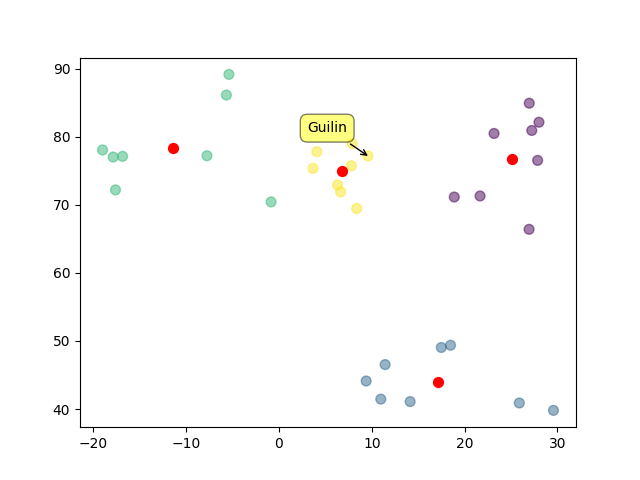

In [11]:
# pip install ipympl necessary to run matplotlib widget
# pip install mplcursors required to run mplcursors

import mplcursors
%matplotlib notebook
%matplotlib widget

fig, ax = plt.subplots()
sc = ax.scatter(df['Jan Temperature'],df['Jan Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 12], c='red', s=50)

cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")

def on_add(sel):
    sel.annotation.set(text=(df['Key'].values)[sel.target.index])
    
plt.show()

<IPython.core.display.Javascript object>


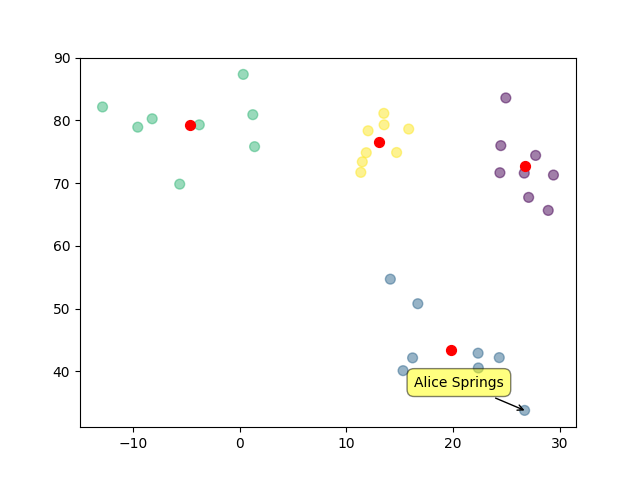

In [12]:
fig, ax = plt.subplots()
sc = ax.scatter(df['Nov Temperature'],df['Nov Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 10], centroids[:, 22], c='red', s=50)

cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")

def on_add(sel):
    sel.annotation.set(text=(df['Key'].values)[sel.target.index])
    
plt.show()